In [1]:
# read data 
import numpy as np 
VSdata = np.loadtxt('VSdata.csv', delimiter=',') 

In [4]:
# separate X and y 
y = VSdata[:,0] 
X = VSdata[:,1:] 

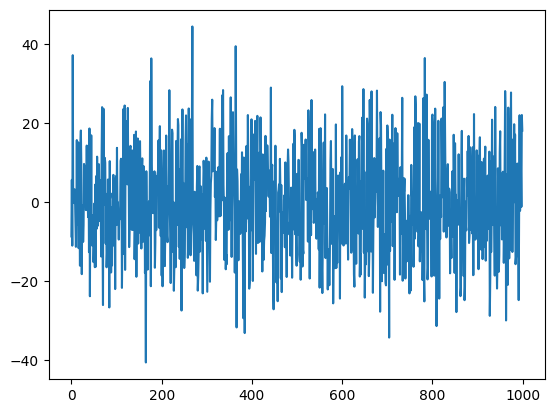

In [5]:
import matplotlib.pyplot as plt
plt.plot(y)

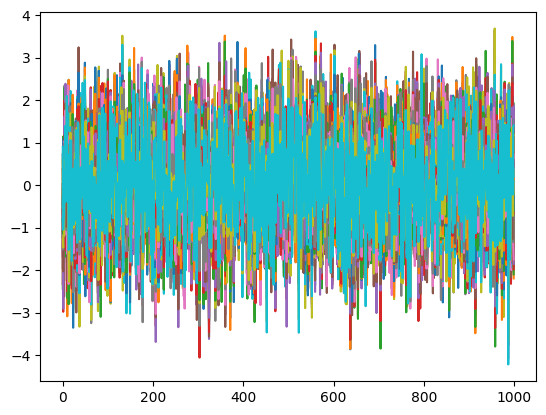

In [7]:
plt.plot(X)

In [15]:
import pandas as pd
df = pd.DataFrame()
df = pd.DataFrame(i for i in VSdata)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

<Axes: >

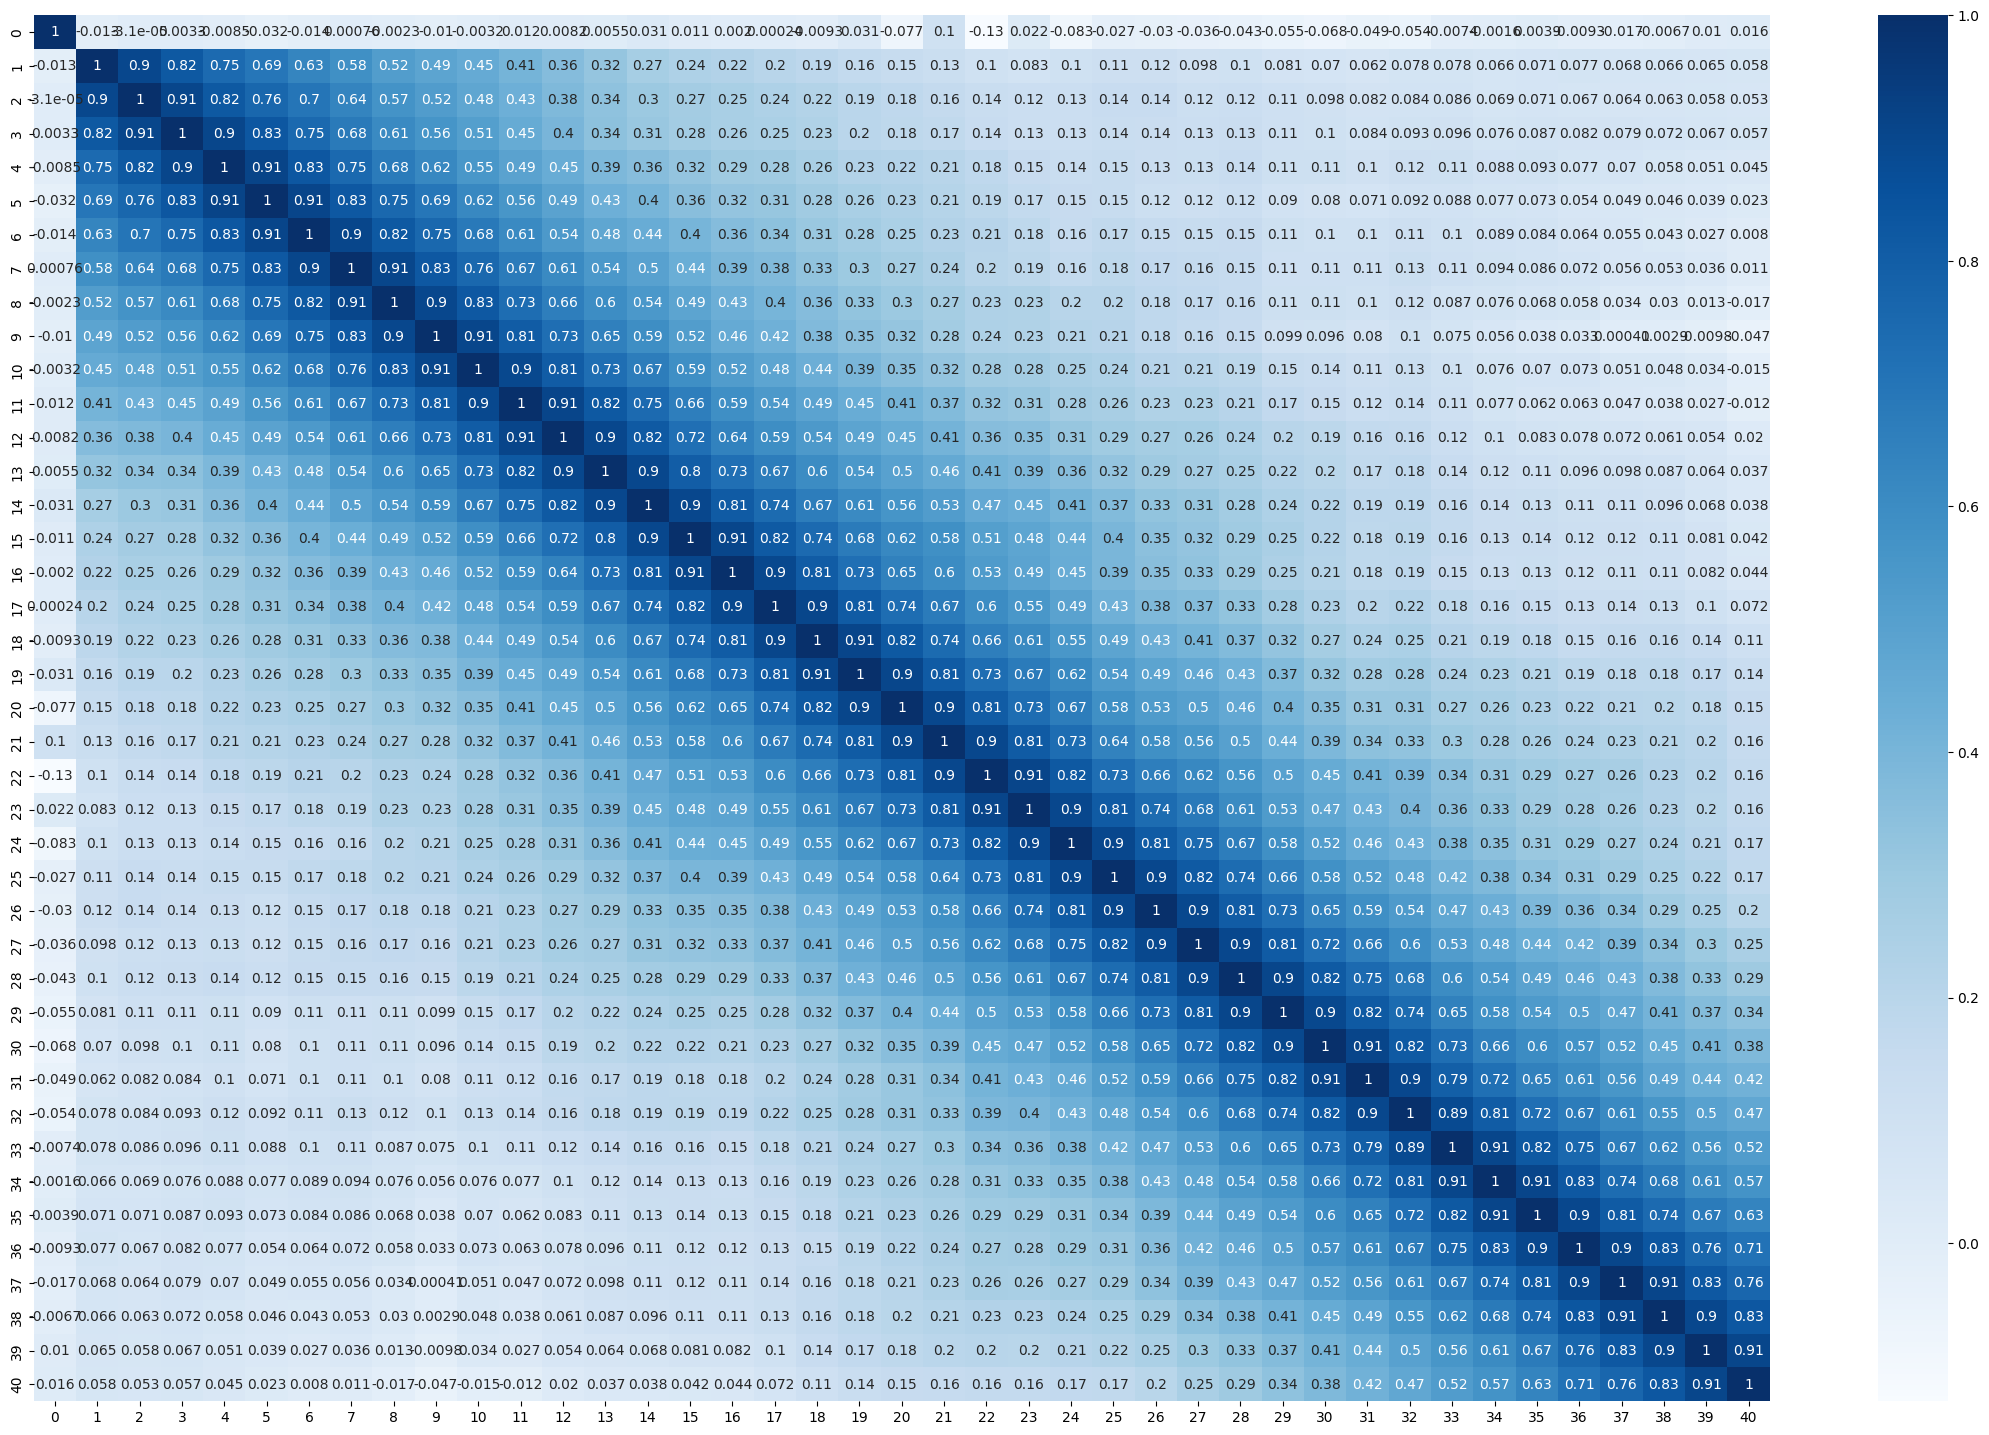

In [27]:
import seaborn as sb
corr = df.corr()
plt.figure(figsize=(28,18))
sb.heatmap(corr, cmap="Blues", annot=True)

In [29]:
# compute linear correlation-based scores 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
VSmodel = SelectKBest(f_regression, k=10).fit(X, y) 
input_scores = VSmodel.scores_ 
print(input_scores)


[1.58054554e-01 9.56982590e-07 1.06741202e-02 7.13517910e-02
 1.00220380e+00 1.95081540e-01 5.78214081e-04 5.28794820e-03
 1.00480482e-01 1.03726309e-02 1.34835584e-01 6.71665197e-02
 3.06953819e-02 9.53686270e-01 1.31552949e-01 3.79521770e-03
 5.68236645e-05 8.72546619e-02 9.80420682e-01 5.88523724e+00
 1.02040870e+01 1.68050590e+01 4.62986741e-01 6.96314987e+00
 7.16226729e-01 8.92436878e-01 1.27677836e+00 1.82109167e+00
 3.07480730e+00 4.64043235e+00 2.36122731e+00 2.96796543e+00
 5.45006498e-02 2.59400142e-03 1.53338601e-02 8.61795433e-02
 2.91853013e-01 4.46758182e-02 9.96211066e-02 2.46061366e-01]


In [30]:
# find the top ranked inputs 
top_k_inputs = np.argsort(input_scores)[::-1][:10] + 1 
# [::-1] reverses the array returned by argsort() and [:n] gives that last n elements 
# reduce X to only top relevant inputs 
X_relevant = VSmodel.transform(X)


In [31]:
top_k_inputs

array([22, 21, 24, 20, 30, 29, 32, 31, 28, 27], dtype=int64)

In [40]:
print(input_scores[27])

1.8210916693507457


In [34]:
X_relevant

array([[ 0.15486547, -0.04881263,  0.38144335, ..., -0.78455145,
        -0.29969342, -0.10379533],
       [-1.95122274, -1.69288627, -1.59527093, ..., -1.15110967,
        -0.99727205, -0.70573805],
       [ 0.35140753, -0.15804939,  0.32304342, ...,  0.26284399,
         1.09216376,  0.46159997],
       ...,
       [-1.95393842, -1.84657783, -1.80026639, ..., -0.56115751,
        -0.63222009, -0.62396926],
       [ 0.34333865,  0.92960083, -0.02763106, ..., -0.2536824 ,
        -0.61593931,  0.16337718],
       [-1.66156668, -1.80878542, -2.19656192, ...,  0.39785562,
        -0.27177255,  0.15069307]])

In [41]:
df2 = pd.DataFrame()
df2 = pd.DataFrame(i for i in X_relevant)

<Axes: >

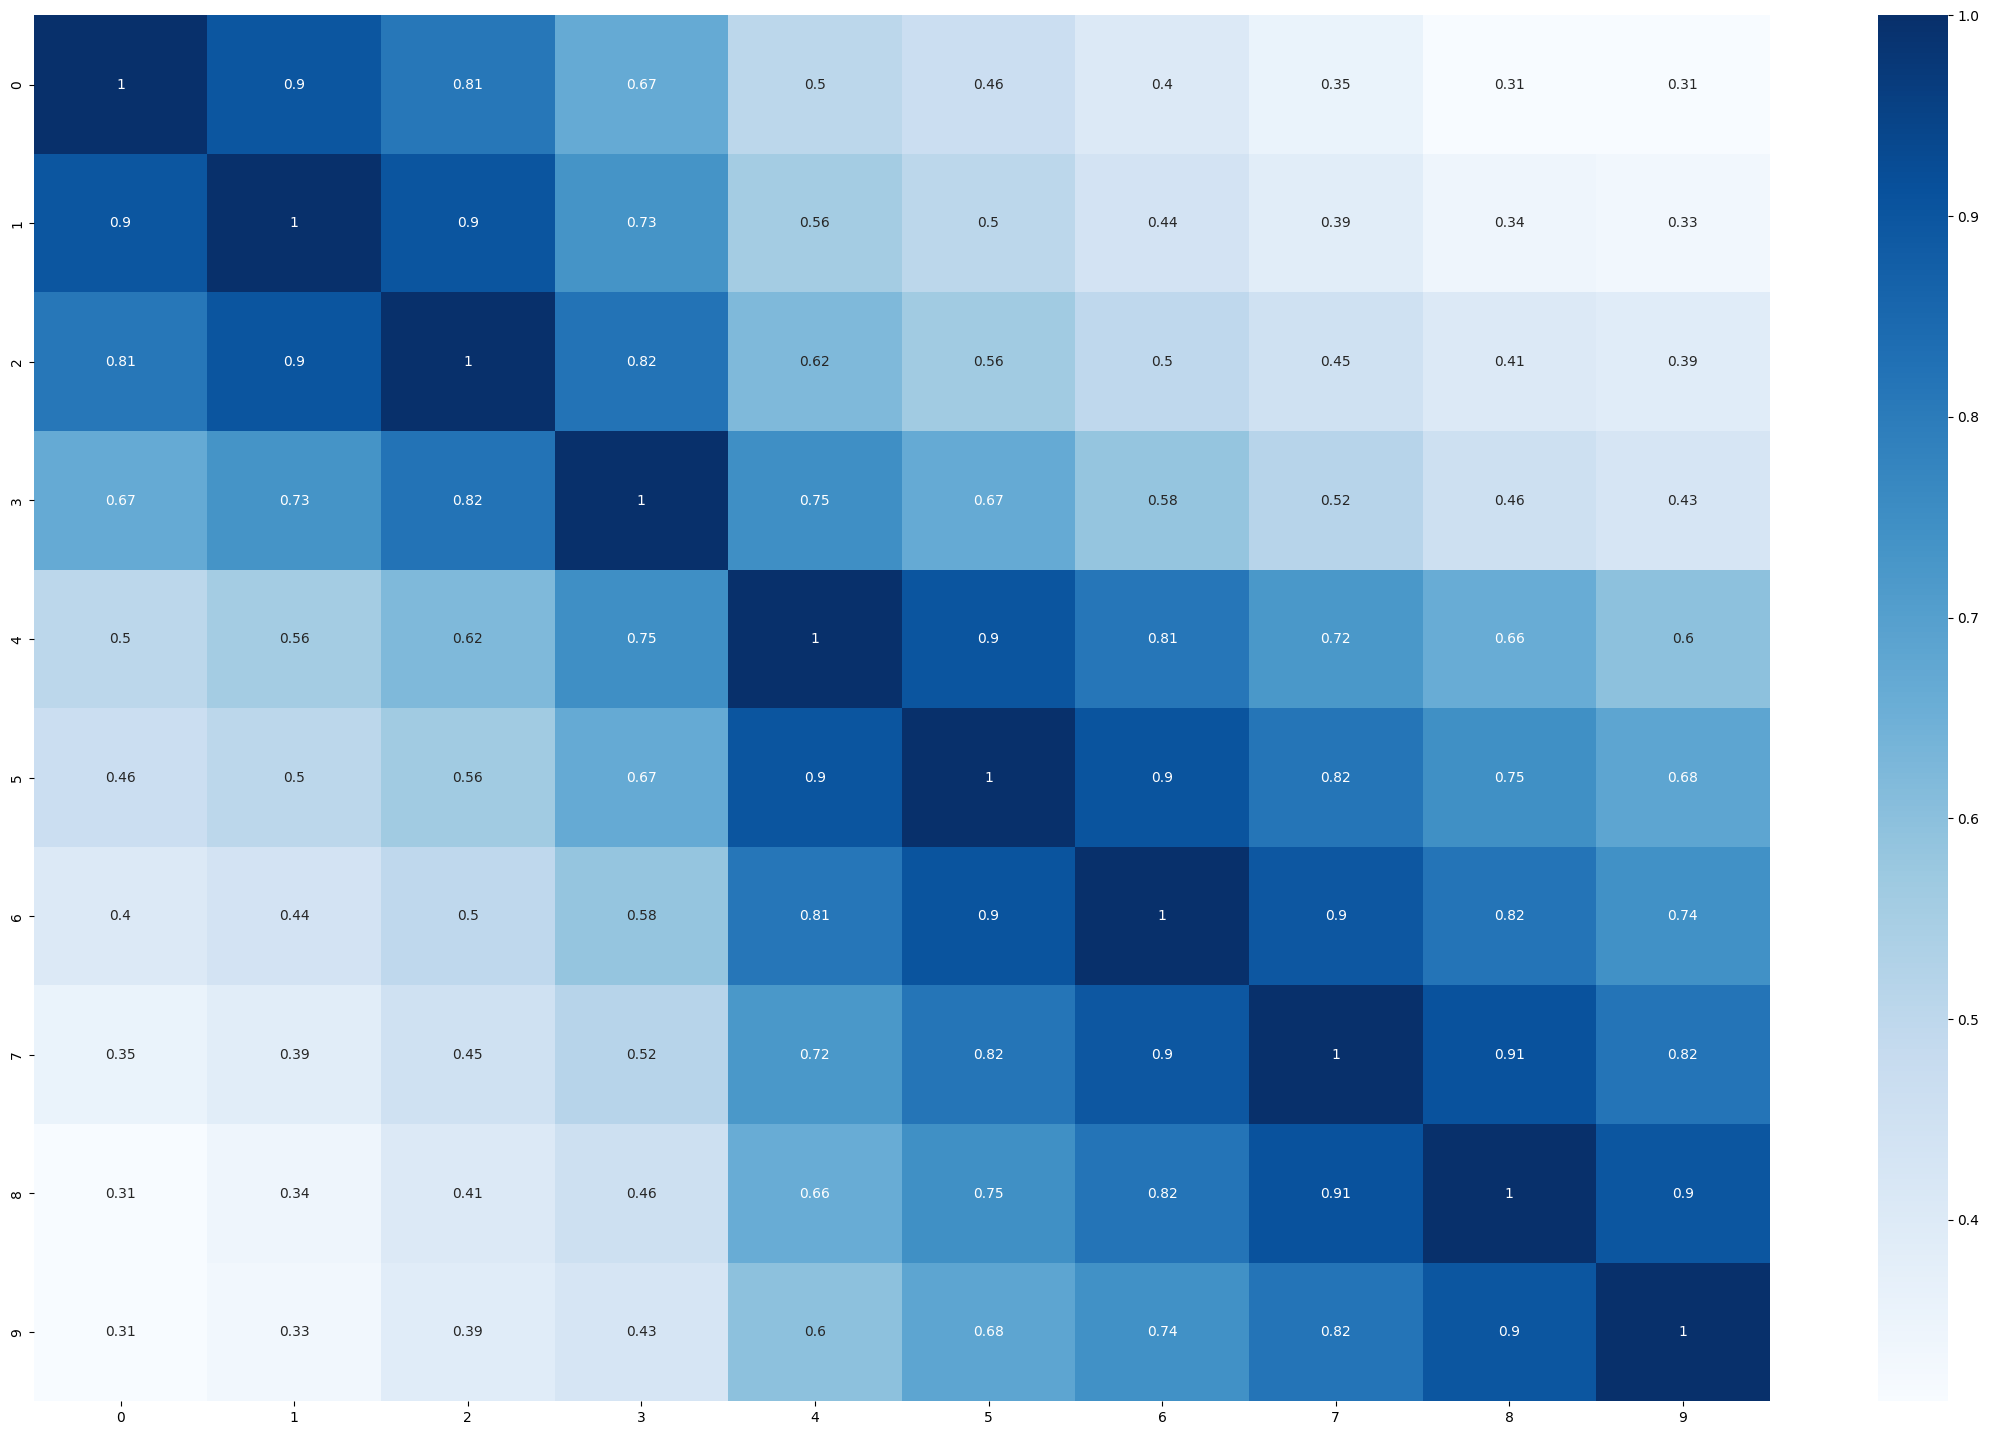

In [42]:
import seaborn as sb
corr = df2.corr()
plt.figure(figsize=(28,18))
sb.heatmap(corr, cmap="Blues", annot=True)

##Implementação do Sklearn